<a href="https://colab.research.google.com/github/SuperNZH/IBM-Professional-Certificate-Machine-Learning-Artifacts/blob/main/3_Classification/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Points

## Intro
1. Logistic regression mainly focus on the **binary classfication** algo
2. LR = linear regression + sigmoid act(map prediction to probility)
3. Decision Boundary will be used to seperate the outcome(Y/N, P/F etc)
4. Independent value should not be highly correlated
5. Types of it can be binary, multinomial and ordinal


# Code

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## EDA

In [2]:
path = '/content/drive/MyDrive/Colab_Notebooks/dataset/weatherAUS.csv'
data = pd.read_csv(path)

In [3]:
data.shape

(198656, 24)

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
col_names = data.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
data.drop(['RISK_MM'], axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198656 entries, 0 to 198655
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           198656 non-null  object 
 1   Location       198656 non-null  object 
 2   MinTemp        195647 non-null  float64
 3   MaxTemp        195849 non-null  float64
 4   Rainfall       193292 non-null  float64
 5   Evaporation    96716 non-null   float64
 6   Sunshine       88211 non-null   float64
 7   WindGustDir    183548 non-null  object 
 8   WindGustSpeed  183657 non-null  float64
 9   WindDir9am     183069 non-null  object 
 10  WindDir3pm     190469 non-null  object 
 11  WindSpeed9am   195074 non-null  float64
 12  WindSpeed3pm   191852 non-null  float64
 13  Humidity9am    194602 non-null  float64
 14  Humidity3pm    190792 non-null  float64
 15  Pressure9am    176742 non-null  float64
 16  Pressure3pm    176752 non-null  float64
 17  Cloud9am       114702 non-nul

### Seperate the Categorical and numerical variables

In [8]:
categorical = [var for var in data.columns if data[var].dtype == 'object']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are: ', categorical)

There are 7 categorical variables

The categorical variables are:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
data[categorical].head()

# 1 date
# 2 binary var

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [10]:
# missing values in cate vars
data[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     15108
WindDir9am      15587
WindDir3pm       8187
RainToday        5364
RainTomorrow     5364
dtype: int64

In [11]:
cat1 = [var for var in categorical if data[var].isnull().sum()!=0]
cat1

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [12]:
# Frequency counts of categorical variables

for var in categorical:
  print(data[var].value_counts())

2015-05-14    49
2015-12-16    49
2015-12-04    49
2015-12-05    49
2015-12-06    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 4533, dtype: int64
Canberra            4533
Sydney              4441
Darwin              4290
Hobart              4290
Brisbane            4290
Melbourne           4290
Perth               4289
Wollongong          4137
AliceSprings        4137
Launceston          4137
Townsville          4137
GoldCoast           4137
Cairns              4137
Ballarat            4137
Albury              4137
Albany              4136
MountGambier        4136
Tuggeranong         4136
Penrith             4136
Bendigo             4128
MountGinini         4125
Williamtown         4106
Richmond            4106
Cobar               4106
CoffsHarbour        4106
Moree               4106
Woomera             4106
NorfolkIsland       4106
Mildura             4106
Dartmoor            4106
Watsonia            4106

In [13]:
# View frequency distribution of categorical variables

for var in categorical:
  print(data[var].value_counts()/np.float(len(data)))

2015-05-14    0.000247
2015-12-16    0.000247
2015-12-04    0.000247
2015-12-05    0.000247
2015-12-06    0.000247
                ...   
2007-11-29    0.000005
2007-11-28    0.000005
2007-11-27    0.000005
2007-11-26    0.000005
2008-01-31    0.000005
Name: Date, Length: 4533, dtype: float64
Canberra            0.022818
Sydney              0.022355
Darwin              0.021595
Hobart              0.021595
Brisbane            0.021595
Melbourne           0.021595
Perth               0.021590
Wollongong          0.020825
AliceSprings        0.020825
Launceston          0.020825
Townsville          0.020825
GoldCoast           0.020825
Cairns              0.020825
Ballarat            0.020825
Albury              0.020825
Albany              0.020820
MountGambier        0.020820
Tuggeranong         0.020820
Penrith             0.020820
Bendigo             0.020780
MountGinini         0.020765
Williamtown         0.020669
Richmond            0.020669
Cobar               0.020669
CoffsHarbo

In [14]:
# Check the cardinality

for var in categorical:
  print(var, " contains ", len(data[var].unique()), " different labels")

Date  contains  4533  different labels
Location  contains  49  different labels
WindGustDir  contains  17  different labels
WindDir9am  contains  17  different labels
WindDir3pm  contains  17  different labels
RainToday  contains  3  different labels
RainTomorrow  contains  3  different labels


### Date variable

In [15]:
# For Date variable
# parse the date as datetime format

data['Date'] = pd.to_datetime(data['Date'])

In [16]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop('Date', axis = 1, inplace = True)

In [17]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Categorical variable

In [18]:
# Process other categorical variables
cate = [var for var in data.columns if data[var].dtype == 'object']
data[cate].isnull().sum()

Location            0
WindGustDir     15108
WindDir9am      15587
WindDir3pm       8187
RainToday        5364
RainTomorrow     5364
dtype: int64

In [19]:
# Process the location
print(len(data.Location.unique()))
data.Location.unique()

# One hot encoding must used for this kind of variables

49


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [20]:
# The reason of using drop_first is because of Im trying to reduce the corelation between variables
# And T/F actually contain same information, just reduce the complexity
# to some extent, drop_first may not improve the performance
pd.get_dummies(data['Location'], drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# WindGustDir

print(data['WindGustDir'].unique())
print(data['WindGustDir'].value_counts())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
W      13583
SE     12618
N      12424
E      12413
WSW    12398
S      12346
SSE    12201
SSW    12190
SW     12025
WNW    11240
ENE    11097
NW     10948
ESE    10211
NE      9763
NNE     9051
NNW     9040
Name: WindGustDir, dtype: int64


In [22]:
pd.get_dummies(data.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
pd.get_dummies(data.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    11097
ESE    10211
N      12424
NE      9763
NNE     9051
NNW     9040
NW     10948
S      12346
SE     12618
SSE    12201
SSW    12190
SW     12025
W      13583
WNW    11240
WSW    12398
NaN    15108
dtype: int64

In [24]:
print(data['WindDir3pm'].unique())
print(data['WindDir3pm'].value_counts())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
SE     14313
W      13760
S      13132
WSW    13028
SW     12442
SSE    12366
WNW    12139
N      11835
ESE    11602
NW     11550
NE     11319
E      11286
SSW    11228
ENE    10675
NNW    10596
NNE     9198
Name: WindDir3pm, dtype: int64


In [25]:
pd.get_dummies(data['WindDir3pm'], drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [26]:
pd.get_dummies(data.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    10675
ESE    11602
N      11835
NE     11319
NNE     9198
NNW    10596
NW     11550
S      13132
SE     14313
SSE    12366
SSW    11228
SW     12442
W      13760
WNW    12139
WSW    13028
NaN     8187
dtype: int64

In [27]:
# Process the RainToday

print(data['RainToday'].unique())
print(data['RainToday'].value_counts())

['No' 'Yes' nan]
No     151252
Yes     42040
Name: RainToday, dtype: int64


In [28]:
pd.get_dummies(data.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### Numerical variable

In [29]:
# Find numerical variables

numerical = [var for var in data.columns if data[var].dtype != "object"]
print('There are ', len(numerical), " different numerical variables")
print('The numerical variables are: ', numerical)

There are  19  different numerical variables
The numerical variables are:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [30]:
data[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [31]:
# Check the missing values in numerical variables

data[numerical].isnull().sum()

MinTemp            3009
MaxTemp            2807
Rainfall           5364
Evaporation      101940
Sunshine         110445
WindGustSpeed     14999
WindSpeed9am       3582
WindSpeed3pm       6804
Humidity9am        4054
Humidity3pm        7864
Pressure9am       21914
Pressure3pm       21904
Cloud9am          83954
Cloud3pm          89997
Temp9am            3052
Temp3pm            6856
Year                  0
Month                 0
Day                   0
dtype: int64

In [32]:
# Outliers in numerical variables

data[numerical].describe()

# Columns contain outliers: Rainfall, Evaporation, WindSpeed9om, WindSpeed3pm

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,195647.000000,195849.000000,193292.000000,96716.000000,88211.000000,183657.000000,195074.000000,191852.000000,194602.000000,190792.000000,176742.000000,176752.000000,114702.000000,108659.000000,195604.000000,191800.000000,198656.00000,198656.000000,198656.000000
mean,12.037551,23.198438,2.273539,5.512777,7.628150,40.068176,14.020659,18.626123,68.695435,51.091864,1017.773892,1015.349796,4.593695,4.602398,16.880649,21.671544,2014.72623,6.475455,15.716913
std,6.438164,7.151668,8.392070,4.261882,3.767403,13.613287,8.906430,8.758763,19.529563,21.067199,7.067793,7.017653,2.896669,2.751591,6.543506,6.997536,3.82440,3.407428,8.796209
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.200000,-5.100000,2007.00000,1.000000,1.000000
25%,7.400000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.100000,1010.500000,1.000000,2.000000,12.200000,16.600000,2011.00000,4.000000,8.000000
50%,11.800000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.600000,21.100000,2014.00000,6.000000,16.000000
75%,16.700000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.600000,1020.200000,7.000000,7.000000,21.500000,26.400000,2018.00000,9.000000,23.000000
max,33.900000,48.900000,474.000000,138.700000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,2021.00000,12.000000,31.000000


Text(0, 0.5, 'WindSpeed3pm')

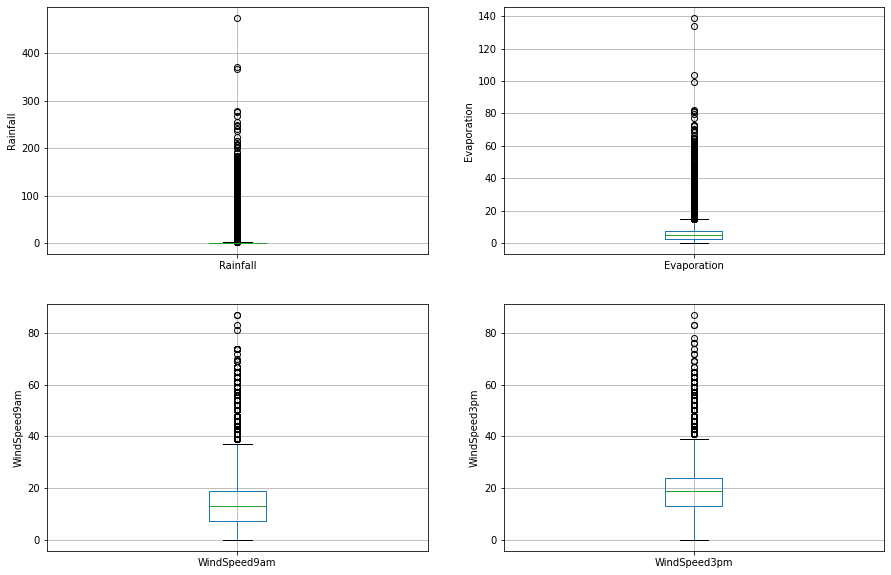

In [33]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

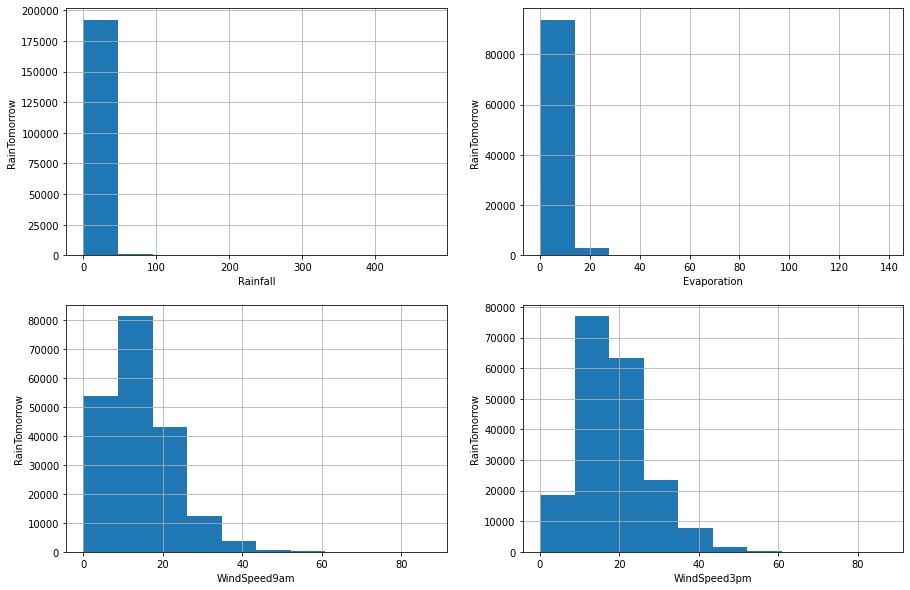

In [34]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [35]:
# find outliers for Rainfall variable

IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for Evaporation variable

IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed9am variable

IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed3pm variable

IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


## Feature vector and target variable

In [36]:
X = data.drop(['RainTomorrow'], axis = 1)
y = data['RainTomorrow']

## Split data into train and test

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("The Data Size: ", X_train.shape, X_test.shape)

The Data Size:  (158924, 24) (39732, 24)


## Feature Engineering

In [38]:
# Check the data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [39]:
# Display categorical and numerical variables

categorical = [var for var in X_train.columns if X_train[var].dtypes == 'object']
print(categorical)

numerical = [var for var in X_train.columns if X_train[var].dtypes != 'object']
print(numerical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


### Engineering the missing values in numerical features

In [40]:
X_train[numerical].isnull().sum()

MinTemp           2378
MaxTemp           2235
Rainfall          4291
Evaporation      81408
Sunshine         88225
WindGustSpeed    12013
WindSpeed9am      2886
WindSpeed3pm      5471
Humidity9am       3236
Humidity3pm       6318
Pressure9am      17504
Pressure3pm      17501
Cloud9am         67080
Cloud3pm         71968
Temp9am           2432
Temp3pm           5493
Year                 0
Month                0
Day                  0
dtype: int64

In [41]:
X_test[numerical].isnull().sum()

MinTemp            631
MaxTemp            572
Rainfall          1073
Evaporation      20532
Sunshine         22220
WindGustSpeed     2986
WindSpeed9am       696
WindSpeed3pm      1333
Humidity9am        818
Humidity3pm       1546
Pressure9am       4410
Pressure3pm       4403
Cloud9am         16874
Cloud3pm         18029
Temp9am            620
Temp3pm           1363
Year                 0
Month                0
Day                  0
dtype: int64

In [42]:
# output the percentage of missing values in the numerical variables in training set

for var in numerical:
  if X_train[var].isnull().mean()>0:
    print(var, (round(X_train[var].isnull().mean(), 4))*100, "%")

MinTemp 1.5 %
MaxTemp 1.41 %
Rainfall 2.7 %
Evaporation 51.22 %
Sunshine 55.510000000000005 %
WindGustSpeed 7.5600000000000005 %
WindSpeed9am 1.82 %
WindSpeed3pm 3.44 %
Humidity9am 2.04 %
Humidity3pm 3.9800000000000004 %
Pressure9am 11.01 %
Pressure3pm 11.01 %
Cloud9am 42.21 %
Cloud3pm 45.28 %
Temp9am 1.53 %
Temp3pm 3.46 %


In [43]:
# two ways to impute the missing values
# The 1st is mean or median imputation
# The 2nd is random sample imputation

# The reason why choosing median imputation is because there are outliers in the dataset

for df1 in [X_train, X_test]:
  for col in numerical:
    col_median = X_train[col].median()
    df1[col].fillna(col_median, inplace = True)

In [48]:
print(X_train[numerical].isnull().sum())
print(X_test[numerical].isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64


### Engineering the missing values in categorical variables

In [57]:
print("Missing values percent in categorical variables")

for col in categorical:
  if X_train[col].isnull().mean()>0:
    print(col, round(X_train[col].isnull().mean(), 4)*100, "%")

Missing values percent in categorical variables
WindGustDir 7.62 %
WindDir9am 7.88 %
WindDir3pm 4.14 %
RainToday 2.7 %


In [65]:
X_train['WindGustDir'].mode()

0    W
dtype: object

In [66]:
# Impute missing categorical variables with most frequent values
for feature in [X_train, X_test]:
  feature['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
  feature['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
  feature['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
  feature['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [69]:
# Check the missing values again
print(X_train[categorical].isnull().sum())
print(X_test[categorical].isnull().sum())

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


### Engineering ooutliers in numerical variables

In [70]:
# Columns contain outliers: Rainfall, Evaporation, WindSpeed9om, WindSpeed3pm
# top-coding approach to cap maximum values and remove outliers from the above variables

def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for feature in [X_train, X_test]:
    feature['Rainfall'] = max_value(feature, 'Rainfall', 3.2)
    feature['Evaporation'] = max_value(feature, 'Evaporation', 21.8)
    feature['WindSpeed9am'] = max_value(feature, 'WindSpeed9am', 55)
    feature['WindSpeed3pm'] = max_value(feature, 'WindSpeed3pm', 57)

In [77]:
print("TrainMax - TestMax")
print(X_train.Rainfall.max(), "  -  ", X_test.Rainfall.max())
print(X_train.Evaporation.max(), "  -  ", X_test.Evaporation.max())
print(X_train.WindSpeed9am.max(), "  -  ", X_test.WindSpeed9am.max())
print(X_train.WindSpeed3pm.max(), "  -  ", X_test.WindSpeed3pm.max())

TrainMax - TestMax
3.2   -   3.2
21.8   -   21.8
55.0   -   55.0
57.0   -   57.0


In [78]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000,158924.000000
mean,12.035476,23.188246,0.647953,5.113472,8.111972,39.983464,13.986805,18.638041,68.734773,51.128275,1017.756708,1015.338996,4.766209,4.783614,16.875599,21.651127,2014.726681,6.473295,15.709037
std,6.393846,7.106598,1.166944,2.620235,2.548425,13.087807,8.801192,8.589073,19.341048,20.645218,6.660319,6.614245,2.208702,2.043076,6.498113,6.881185,3.823888,3.408530,8.794333
min,-8.700000,-3.800000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.200000,-5.100000,2007.000000,1.000000,1.000000
25%,7.500000,18.000000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.700000,1011.200000,4.000000,5.000000,12.200000,16.700000,2011.000000,4.000000,8.000000
50%,11.800000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.600000,21.100000,2014.000000,6.000000,16.000000
75%,16.600000,28.100000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.900000,1019.500000,6.000000,6.000000,21.400000,26.200000,2018.000000,9.000000,23.000000
max,33.900000,48.900000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,2021.000000,12.000000,31.000000


### Encode categorical variables

In [79]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
100648,Nhil,ENE,ENE,NNE,No
141389,Nuriootpa,SW,SE,SSW,No
166593,Perth,WSW,S,SW,Yes
136199,MountGambier,WNW,N,NNW,No
90656,MelbourneAirport,SSE,W,SE,No


In [81]:
# Encode RainToday
import category_encoders from sklearn as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

SyntaxError: ignored